In [1]:
import uproot4
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

import os

from utils.histograms import histogram1D

In [2]:
def load_files(path : str):
    tracks = {}
    (path, subdir, files) = next(os.walk(path))
    for i, file in enumerate(files): 
        events = uproot4.open(os.path.join(path, file))['LDMX_Events']
        if events.num_entries == 0: continue
        for v in events['TaggerTracks_tracking'].keys(): 
            name = v[22:-1]
            if i == 0: 
                tracks[name] = events['TaggerTracks_tracking'][v].array(library='np')
            else: 
                tracks[name] =  np.append(tracks[name], events['TaggerTracks_tracking'][v].array(library='np'))
    
    return tracks

import math
def create_flat_arrays(branch):

    events = { 
        'px': [], 'py': [], 'pz': [], 'p': [], 'n_hits': [],
        'd0': [], 'chi2': [], 'z0': [], 'track_id': [], 'ndf': [],
        'n_shared_hits': []
         }
    for i, values in enumerate(branch['momentum']): 
        if len(values) == 0: 
            continue
        for j, value in enumerate(values): 
            events['px'].append(value[0])
            events['py'].append(value[1])
            events['pz'].append(value[2])
            events['n_hits'].append(branch['n_hits'][i][j])
            events['d0'].append(branch['perigee_pars'][i][j][0])
            events['chi2'].append(branch['chi2'][i][j])
            events['z0'].append(branch['perigee_pars'][i][j][1])
            events['track_id'].append(branch['trackID'][i][j])
            events['ndf'].append(branch['ndf'][i][j])
            events['n_shared_hits'].append(branch['n_shared_hits'][i][j])


    for key in events.keys(): 
        events[key] = np.array(events[key])

    events['p'] = np.sqrt(events['px']*events['px'] + events['py']*events['py'] + events['pz']*events['pz'])
    events['chi2/ndf'] = events['chi2']/(events['ndf'] - 5)

    return events

In [8]:
tag_trks = load_files('batch1/')

In [68]:
tag_trks_s34567 = load_files('batch1_s34567/')

In [70]:
events = create_flat_arrays(tag_trks)

/home/omoreno/.local/lib/python3.6/site-packages/ipykernel_launcher.py:44: RuntimeWarning: divide by zero encountered in true_divide


In [71]:
events_s34567 = create_flat_arrays(tag_trks_s34567)

/home/omoreno/.local/lib/python3.6/site-packages/ipykernel_launcher.py:44: RuntimeWarning: divide by zero encountered in true_divide


In [57]:
tag_trks_midseed = load_files('batch1_new_seed/')

In [83]:
test = load_files('/home/omoreno/projects/ldmx/data/1pt2')

In [84]:
events_notrig = create_flat_arrays(tag_trks_notrig)
events_midseed = create_flat_arrays(tag_trks_midseed)
test_events = create_flat_arrays(test)

/home/omoreno/.local/lib/python3.6/site-packages/ipykernel_launcher.py:44: RuntimeWarning: divide by zero encountered in true_divide


In [59]:
cuts_notrig = events_notrig['track_id'] == 1
cuts_midseed = events_midseed['track_id'] == 1

In [76]:
print(tag_trks_notrig.keys())

dict_keys(['n_hits', 'n_outliers', 'ndf', 'n_shared_hits', 'n_holes', 'chi2', 'perigee_pars', 'perigee_cov', 'perigee', 'momentum', 'position', 'meas_idxs', 'trackID', 'truthProb', 'pdgID'])


In [ ]:
tag_tracks = {}
tag_sim_hits = {}

(path, subdir, files) = next(os.walk('batch1/'))
for i, file in enumerate(files): 
    events = uproot3.open(os.path.join(path, file))['LDMX_Events']
    for v in events['TaggerTracks_tracking'].keys(): 
        name = v[22:-1].decode('UTF-8')
        if i == 0: 
            tag_tracks[name] = events['TaggerTracks_tracking'][v].array()
        else: 
            tag_tracks[name] =  np.append(tag_tracks[name], events['TaggerTracks_tracking'][v].array())
    
    for v in events['TaggerSimHits_tracking'].keys():
        name = v[23:-1].decode('UTF-8')
        if i == 0: 
            tag_sim_hits[name] = events['TaggerSimHits_tracking'][v].array()
        else: 
            tag_sim_hits[name] =  np.append(tag_sim_hits[name], events['TaggerSimHits_tracking'][v].array())    

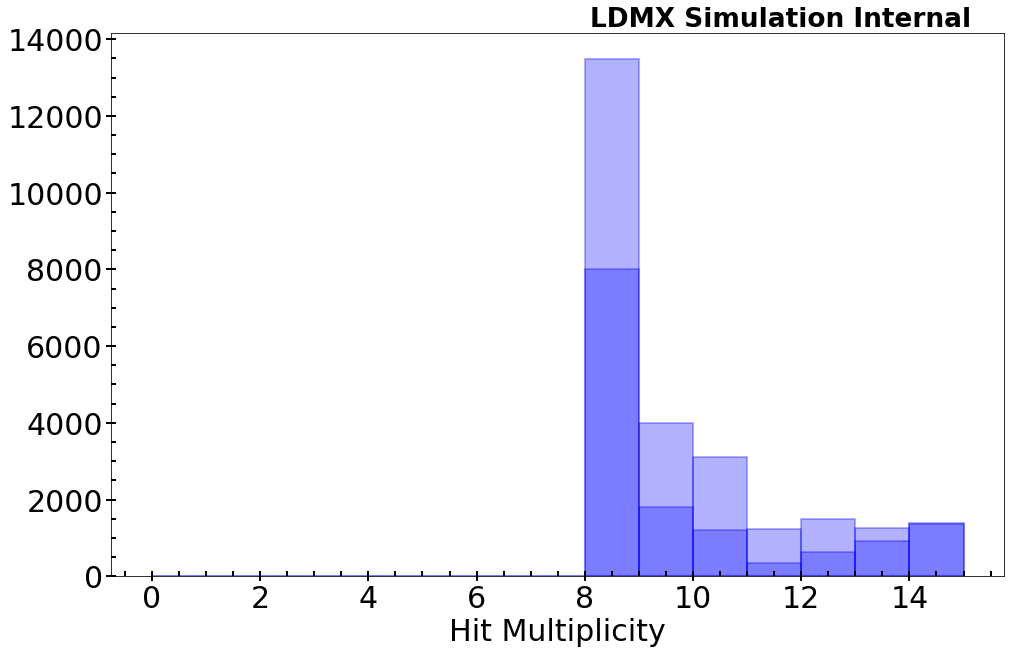

In [72]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 10), 
                       facecolor='white')

histogram1D(ax, events['n_hits'], 0, 15, 16, 
            x_label='Hit Multiplicity');
histogram1D(ax, events_s34567['n_hits'], 0, 15, 16, 
            x_label='Hit Multiplicity');
#histogram1D(ax, events_midseed['n_hits'][cuts_midseed], 0, 14, 15, 
#            x_label='Hit Multiplicity', label='Seed 34567');
#histogram1D(ax, events['n_hits'][track_id_cut], 0, 14, 15, x_label='Hit Multiplicity', label='Seed 01234');
#histogram1D(ax, events_seed['n_hits'][track_id_cut_seed], 0, 14, 15, 
#            x_label='Hit Multiplicity', label='Seed 34567', color='red');
#ax.legend()


NameError: name 'events_notrig' is not defined

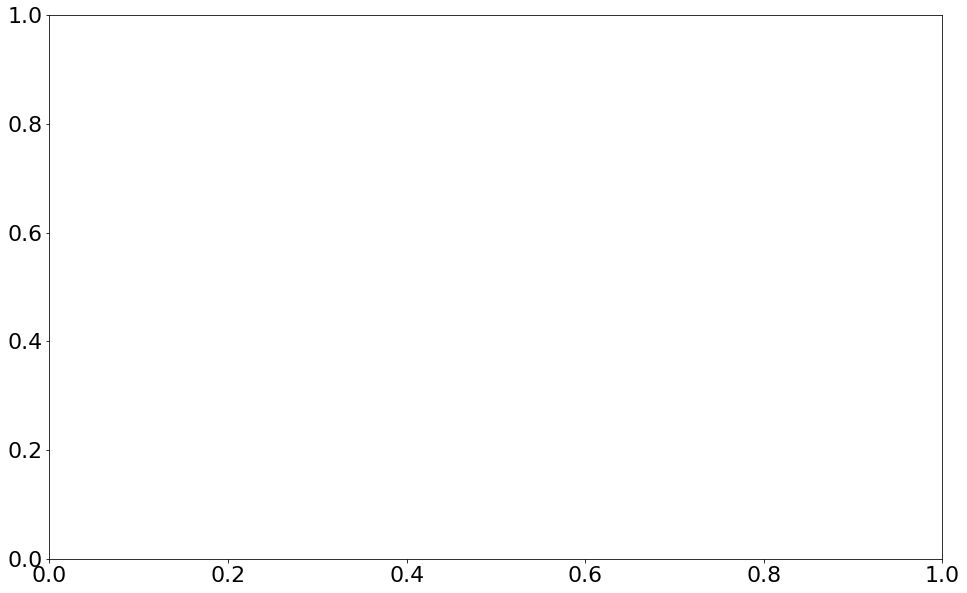

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 10), 
                       facecolor='white')

histogram1D(ax, events_notrig['n_shared_hits'][cuts_notrig], 0, 30, 31, x_label='# of Shared Hits');

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 10), 
                       facecolor='white')

histogram1D(ax, events['chi2/ndf'][track_id_cut], 0, 30, 100, x_label='Chi2/NDF');

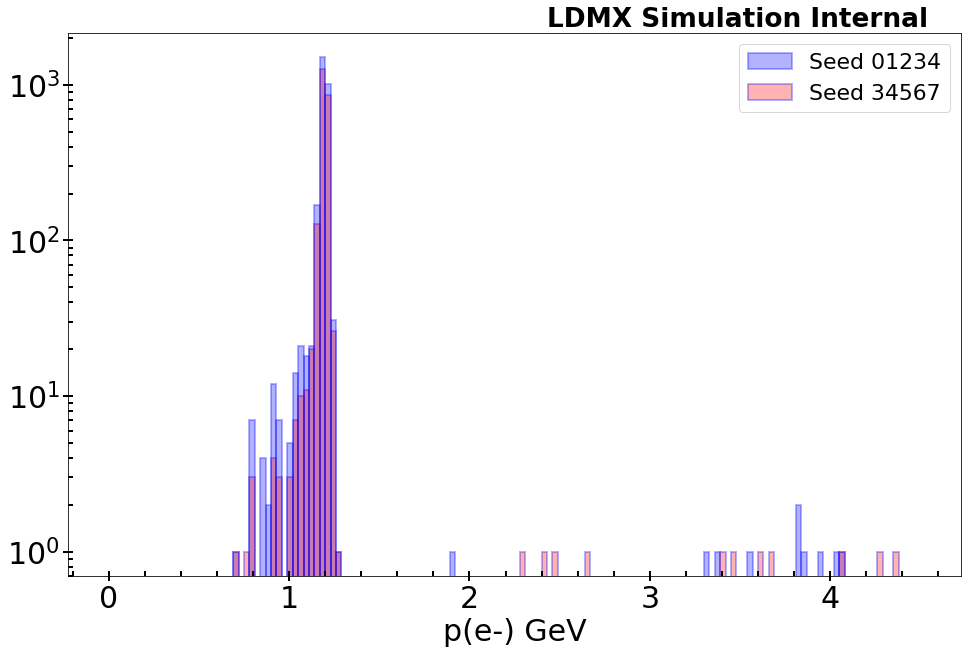

In [74]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 10), 
                       facecolor='white')

#histogram1D(ax, events['p'], 0, 4.5, 451, x_label='p(e-) GeV', label='Seed 01234');
histogram1D(ax, events['p'][(events['chi2/ndf'] < 10) & (events['n_hits'] >= 12) & (events['track_id'] == 1)
                           & (events['d0'] < 11)], 0, 4.5, 151, x_label='p(e-) GeV', label='Seed 01234');
histogram1D(ax, events_s34567['p'][(events_s34567['chi2/ndf'] < 10) & (events_s34567['n_hits'] >= 12) & (events_s34567['track_id'] == 1)
                           & (events_s34567['d0'] < 11)], 0, 4.5, 151, x_label='p(e-) GeV', label='Seed 34567',
           color='red');
#histogram1D(ax, events_midseed['p'][events_midseed['track_id'] == 1], 0, 4.5, 151, x_label='p(e-) GeV', label='Seed 34567',
#           color='red');
#histogram1D(ax, events_notrig['p'][events_notrig['track_id'] == 1], 0, 4.5, 151, x_label='p(e-) GeV', label='No TrigScint');
#histogram1D(ax, events_notrig['p'][
#                (events_notrig['track_id'] == 1) & (events_notrig['chi2/ndf'] < 10)], 
#                0, 4.5, 151, x_label='p(e-) GeV', label='No TrigScint, Chi2/NDF < 10',
#                color='red');


#histogram1D(ax, events['p'][events['chi2/ndf'] < 10], 0, 4.5, 451, 
#            x_label='p(e-) GeV', 
#            color='red', 
#            edgecolor='red', 
#            label='chi2/ndf > 10');
#histogram1D(ax, events_seed['p'], 0, 4.5, 451, 
#            x_label='p(e-) GeV', 
#            color='red', 
#            edgecolor='red', 
#            label='Seed 34567');
ax.legend()
ax.set_yscale('log')

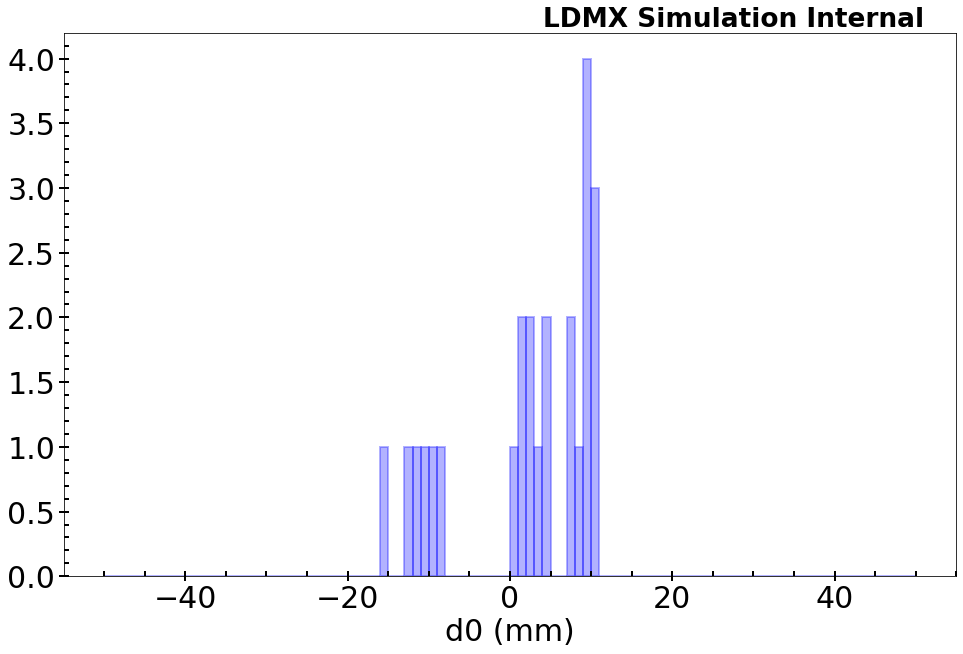

In [59]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 10), 
                       facecolor='white')
histogram1D(ax, events['d0'][(events['chi2/ndf'] < 10) & (events['n_hits'] >= 12) & (events['track_id'] == 1) & (events['p'] > 2.0) & (events['d0'] < 11)], -50, 50, 101, x_label='d0 (mm)', label='All Tracks');

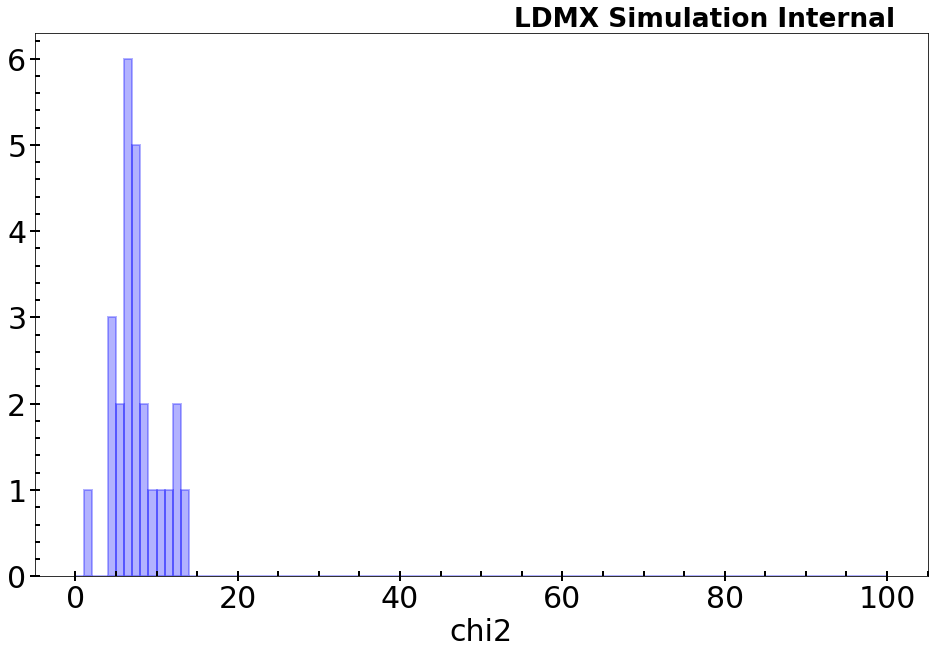

In [61]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 10), 
                       facecolor='white')
histogram1D(ax, events['chi2'][(events['chi2/ndf'] < 10) & (events['n_hits'] >= 12) & (events['track_id'] == 1) & (events['p'] > 1.5) & (events['d0'] < 11)], 0, 100, 101, x_label='chi2', label='All Tracks');

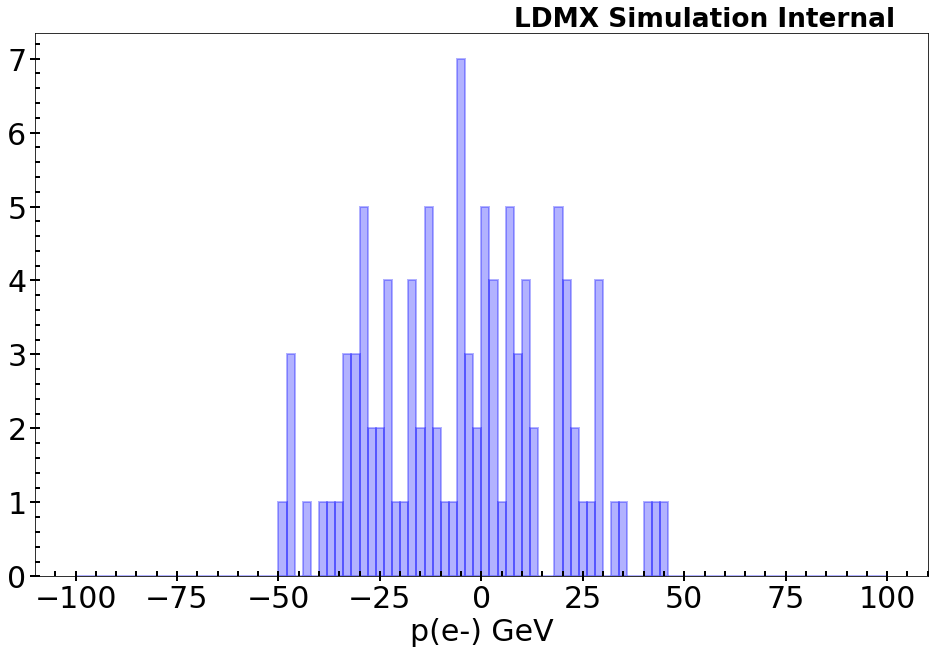

In [54]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 10), 
                       facecolor='white')
histogram1D(ax, events['z0'][(events['chi2/ndf'] < 10) & (events['n_hits'] >= 12) & (events['track_id'] == 1) & (events['p'] > 1.5)], -100, 100, 101, x_label='p(e-) GeV', label='All Tracks');

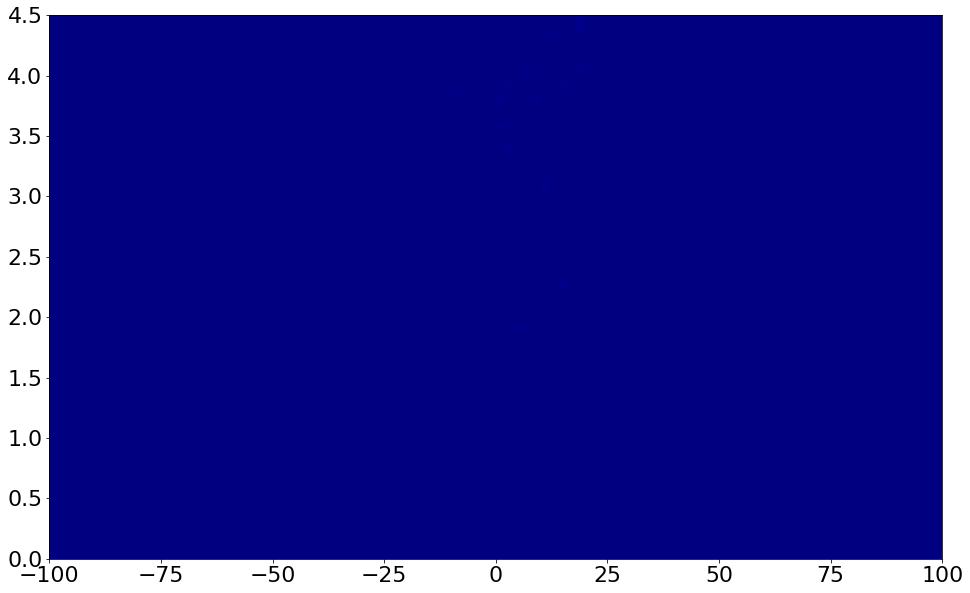

In [55]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 10), 
                       facecolor='white')
norm = colors.Normalize(0, 100)
plt.hist2d(events['d0'][(events['chi2/ndf'] < 10) & (events['n_hits'] >= 12) & (events['track_id'] == 1) & (events['p'] > 1.5)], events['p'][(events['chi2/ndf'] < 10) & (events['n_hits'] >= 12) & (events['track_id'] == 1) & (events['p'] > 1.5)],
           bins=(100, 100), range=[[-100, 100], [0, 4.5]], norm=norm, cmap=plt.cm.jet);

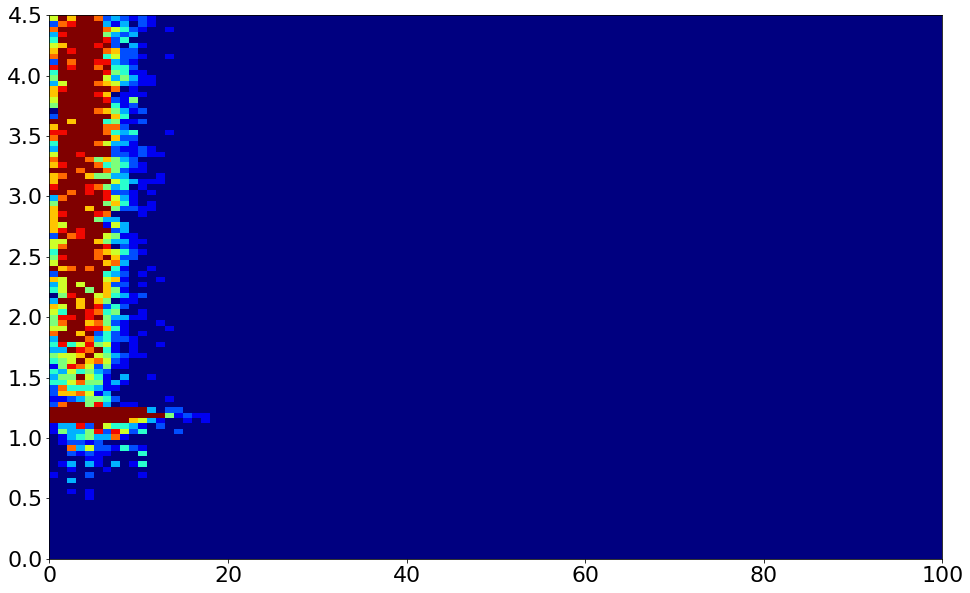

In [19]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 10), 
                       facecolor='white')
norm = colors.Normalize(0, 10)
plt.hist2d(events['chi2'], events['p'],
           bins=(100, 100), range=[[0, 100], [0, 4.5]], norm=norm, cmap=plt.cm.jet);

NameError: name 'tag_events' is not defined

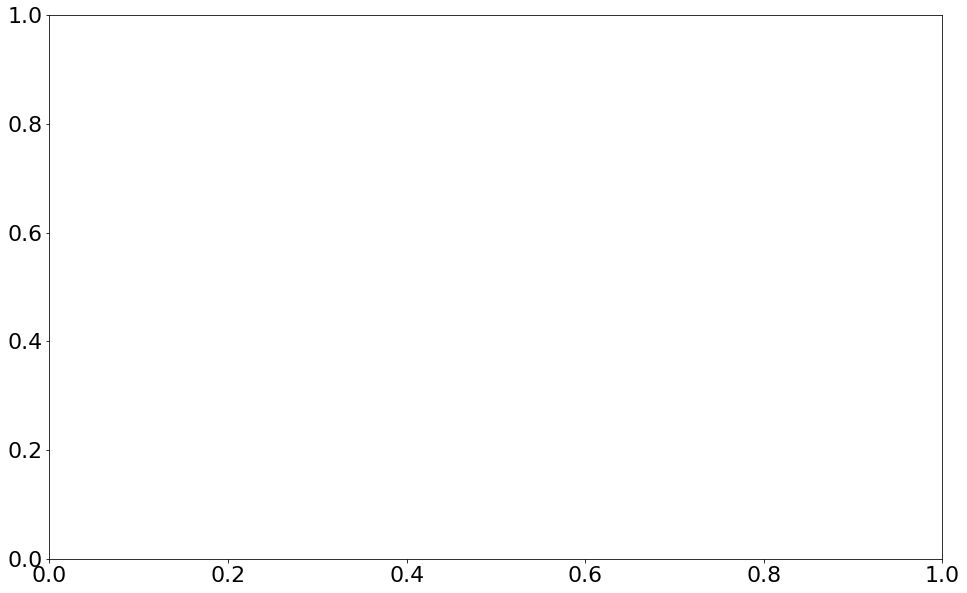

In [20]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 10), 
                       facecolor='white')

incident_e_cut = tag_events[var_names['trackID']].array().flatten() == 1
all_cut = tag_events[var_names['trackID']].array().flatten() != 1

#plt.hist2d(tag_events[var_names['z']].array().flatten(), 
#           tag_events[var_names['x']].array().flatten(), 
#           bins=(100, 100), cmap=plt.cm.jet);
plt.scatter(tag_events[var_names['z']].array().flatten()[incident_e_cut], 
         tag_events[var_names['y']].array().flatten()[incident_e_cut], 
         (tag_events[var_names['time']].array().flatten()[incident_e_cut]+2),
         marker='o');
plt.plot(tag_events[var_names['z']].array().flatten()[all_cut], 
         tag_events[var_names['y']].array().flatten()[all_cut], marker='o', linestyle='none');

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 10), 
                       facecolor='white')

incident_e_cut = tag_events[var_names['trackID']].array().flatten() == 1
all_cut = tag_events[var_names['trackID']].array().flatten() != 1

#plt.hist2d(tag_events[var_names['z']].array().flatten(), 
#           tag_events[var_names['x']].array().flatten(), 
#           bins=(100, 100), cmap=plt.cm.jet);
plt.plot(tag_events[var_names['z']].array().flatten()[incident_e_cut], 
         tag_events[var_names['time']].array().flatten()[incident_e_cut], marker='o', linestyle='none');

In [ ]:

plt.hist2d(tag_tracks['z'].flatten(), tag_tracks['x'].flatten(),
           bins=(100, 100), cmap=plt.cm.jet);
#points = plt.scatter(tag_events[var_names['z']].array().flatten()[incident_e_cut], 
#         tag_events[var_names['x']].array().flatten()[incident_e_cut],
#         c=tag_events[var_names['time']].array().flatten()[incident_e_cut], cmap='Greens')
#ax.set_xlabel('z (mm)', fontsize=30)
#ax.set_ylabel('x (mm)', fontsize=30)
#ax.minorticks_on()
#ax.tick_params(which='major', length=10, width=2, direction='inout', labelsize=30)
#ax.tick_params(which='minor', length=5, width=2, direction='in', labelsize=30)

#fig.colorbar(points)

#plt.plot(tag_events[var_names['z']].array().flatten()[all_cut], 
#         tag_events[var_names['x']].array().flatten()[all_cut], marker='o', linestyle='none');